# Importing Data

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('tested.csv')

In [3]:
dfnew=df.copy()
df

PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
0                                Kelly, Mr. James    male  34.5      0      0   
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                       Myles, Mr. Thomas Francis    male  62.0      0      0   
3                                Wirz, Mr. Albert    male  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
..                                            ...     ...   ...    ...    ...   
413                            Spector, Mr. Woolf    male   NaN      0      0   
414                  Oliva y Ocana, Dona. Fermina  female  39.0      0      0   
415                  Saether, Mr. Simon Sivertsen    male  38.5      0      0   
416                           Ware, Mr. Frederick    male   NaN      0      0   
417                      Peter, Master. Michael J    male   NaN      1      1   

                 Ticket      Fare Cabin Embarked  
0                330911    7.8292   NaN        Q  
1                363272    7.0000   NaN        S  
2                240276    9.6875   NaN        Q  
3                315154    8.6625   NaN        S  
4               3101298   12.2875   NaN        S  
..                  ...       ...   ...      ...  
413           A.5. 3236    8.0500   NaN        S  
414            PC 17758  108.9000  C105        C  
415  SOTON/O.Q. 3101262    7.2500   NaN        S  
416              359309    8.0500   NaN        S  
417                2668   22.3583   NaN        C  

[418 rows x 12 columns]

# Getting some information about the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [5]:
df.describe(include='all')

PassengerId    Survived      Pclass              Name   Sex  \
count    418.000000  418.000000  418.000000               418   418   
unique          NaN         NaN         NaN               418     2   
top             NaN         NaN         NaN  Kelly, Mr. James  male   
freq            NaN         NaN         NaN                 1   266   
mean    1100.500000    0.363636    2.265550               NaN   NaN   
std      120.810458    0.481622    0.841838               NaN   NaN   
min      892.000000    0.000000    1.000000               NaN   NaN   
25%      996.250000    0.000000    1.000000               NaN   NaN   
50%     1100.500000    0.000000    3.000000               NaN   NaN   
75%     1204.750000    1.000000    3.000000               NaN   NaN   
max     1309.000000    1.000000    3.000000               NaN   NaN   

               Age       SibSp       Parch    Ticket        Fare  \
count   332.000000  418.000000  418.000000       418  417.000000   
unique         NaN         NaN         NaN       363         NaN   
top            NaN         NaN         NaN  PC 17608         NaN   
freq           NaN         NaN         NaN         5         NaN   
mean     30.272590    0.447368    0.392344       NaN   35.627188   
std      14.181209    0.896760    0.981429       NaN   55.907576   
min       0.170000    0.000000    0.000000       NaN    0.000000   
25%      21.000000    0.000000    0.000000       NaN    7.895800   
50%      27.000000    0.000000    0.000000       NaN   14.454200   
75%      39.000000    1.000000    0.000000       NaN   31.500000   
max      76.000000    8.000000    9.000000       NaN  512.329200   

                  Cabin Embarked  
count                91      418  
unique               76        3  
top     B57 B59 B63 B66        S  
freq                  3      270  
mean                NaN      NaN  
std                 NaN      NaN  
min                 NaN      NaN  
25%                 NaN      NaN  
50%                 NaN      NaN  
75%                 NaN      NaN  
max                 NaN      NaN

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Handling Nan values

In [7]:
avgfair=df["Fare"].mean()
avgfair=round(avgfair,2)
avgfair

35.63

In [8]:
# Handling missing with average fair
df=df.fillna({"Fare":avgfair})

In [9]:
# Handling age with the median
df["Age"].fillna(df["Age"].median(),inplace=True)

In [10]:
# Handing cabin with most frequent word
df["Cabin"].fillna(df["Cabin"].mode()[0],inplace=True)

In [11]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# Removing Duplicates

In [12]:
df=df.drop_duplicates()

In [13]:
df.drop(columns=["Cabin"], inplace=True)

In [14]:
df

PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
0                                Kelly, Mr. James    male  34.5      0      0   
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                       Myles, Mr. Thomas Francis    male  62.0      0      0   
3                                Wirz, Mr. Albert    male  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
..                                            ...     ...   ...    ...    ...   
413                            Spector, Mr. Woolf    male  27.0      0      0   
414                  Oliva y Ocana, Dona. Fermina  female  39.0      0      0   
415                  Saether, Mr. Simon Sivertsen    male  38.5      0      0   
416                           Ware, Mr. Frederick    male  27.0      0      0   
417                      Peter, Master. Michael J    male  27.0      1      1   

                 Ticket      Fare Embarked  
0                330911    7.8292        Q  
1                363272    7.0000        S  
2                240276    9.6875        Q  
3                315154    8.6625        S  
4               3101298   12.2875        S  
..                  ...       ...      ...  
413           A.5. 3236    8.0500        S  
414            PC 17758  108.9000        C  
415  SOTON/O.Q. 3101262    7.2500        S  
416              359309    8.0500        S  
417                2668   22.3583        C  

[418 rows x 11 columns]

## Changing Datatypes into numerical as the models can't directlyprocess categorical data

In [15]:
df["Sex"]=df["Sex"].map({"male":0,"female":1})

## Summary of Data

In [16]:
df.describe()

PassengerId    Survived      Pclass         Sex         Age  \
count   418.000000  418.000000  418.000000  418.000000  418.000000   
mean   1100.500000    0.363636    2.265550    0.363636   29.599282   
std     120.810458    0.481622    0.841838    0.481622   12.703770   
min     892.000000    0.000000    1.000000    0.000000    0.170000   
25%     996.250000    0.000000    1.000000    0.000000   23.000000   
50%    1100.500000    0.000000    3.000000    0.000000   27.000000   
75%    1204.750000    1.000000    3.000000    1.000000   35.750000   
max    1309.000000    1.000000    3.000000    1.000000   76.000000   

            SibSp       Parch        Fare  
count  418.000000  418.000000  418.000000  
mean     0.447368    0.392344   35.627195  
std      0.896760    0.981429   55.840500  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    7.895800  
50%      0.000000    0.000000   14.454200  
75%      1.000000    0.000000   31.500000  
max      8.000000    9.000000  512.329200

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    int64  
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         418 non-null    float64
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(6), object(3)
memory usage: 36.0+ KB


In [18]:
categorical=df.select_dtypes(include='object')

categorical_summary = {}
for feature in categorical:
    categorical_summary[feature] = df[feature].value_counts()

for feature, summary in categorical_summary.items():
    print(f"Summary statistics for {feature}:")
    print(summary)
    print()


Summary statistics for Name:
Name
Kelly, Mr. James               1
Carr, Miss. Jeannie            1
Dennis, Mr. William            1
Rosblom, Miss. Salli Helena    1
Touma, Miss. Maria Youssef     1
                              ..
Zakarian, Mr. Mapriededer      1
Carlsson, Mr. Carl Robert      1
Dintcheff, Mr. Valtcho         1
Thomas, Mr. Charles P          1
Peter, Master. Michael J       1
Name: count, Length: 418, dtype: int64

Summary statistics for Ticket:
Ticket
PC 17608    5
CA. 2343    4
113503      4
PC 17483    3
220845      3
           ..
349226      1
2621        1
4133        1
113780      1
2668        1
Name: count, Length: 363, dtype: int64

Summary statistics for Embarked:
Embarked
S    270
C    102
Q     46
Name: count, dtype: int64



In [19]:
df

PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name  Sex   Age  SibSp  Parch  \
0                                Kelly, Mr. James    0  34.5      0      0   
1                Wilkes, Mrs. James (Ellen Needs)    1  47.0      1      0   
2                       Myles, Mr. Thomas Francis    0  62.0      0      0   
3                                Wirz, Mr. Albert    0  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)    1  22.0      1      1   
..                                            ...  ...   ...    ...    ...   
413                            Spector, Mr. Woolf    0  27.0      0      0   
414                  Oliva y Ocana, Dona. Fermina    1  39.0      0      0   
415                  Saether, Mr. Simon Sivertsen    0  38.5      0      0   
416                           Ware, Mr. Frederick    0  27.0      0      0   
417                      Peter, Master. Michael J    0  27.0      1      1   

                 Ticket      Fare Embarked  
0                330911    7.8292        Q  
1                363272    7.0000        S  
2                240276    9.6875        Q  
3                315154    8.6625        S  
4               3101298   12.2875        S  
..                  ...       ...      ...  
413           A.5. 3236    8.0500        S  
414            PC 17758  108.9000        C  
415  SOTON/O.Q. 3101262    7.2500        S  
416              359309    8.0500        S  
417                2668   22.3583        C  

[418 rows x 11 columns]

## Visualize data distributions

Plotting the survived and dead passengers

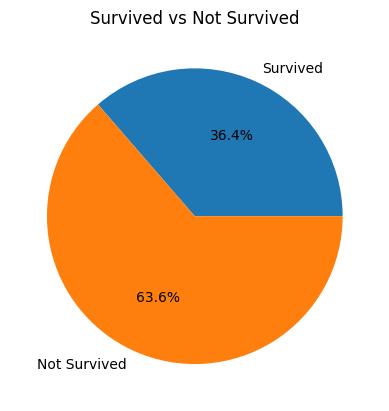

In [20]:
import matplotlib.pyplot as plt
labels = ['Survived', 'Not Survived']
sizes=[df['Survived'].value_counts()[1], df['Survived'].value_counts()[0]]

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Survived vs Not Survived')
plt.show()

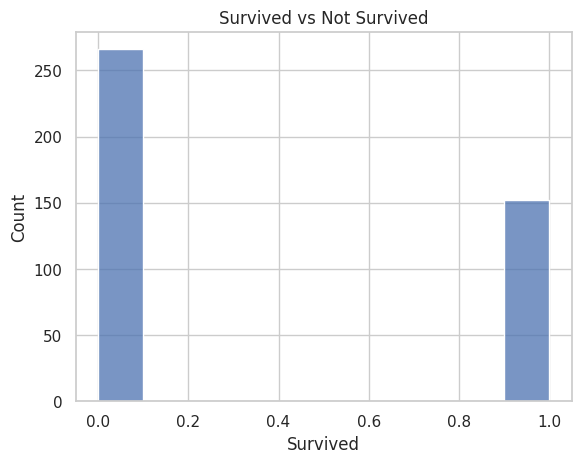

In [37]:
import seaborn as sns

sns.histplot(x='Survived', data=df)
plt.title('Survived vs Not Survived')
plt.show()

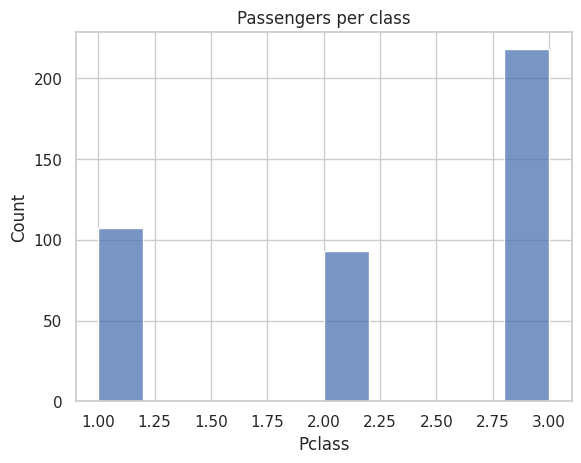

In [38]:
sns.histplot(x='Pclass',data=df)
plt.title('Passengers per class')
plt.show()

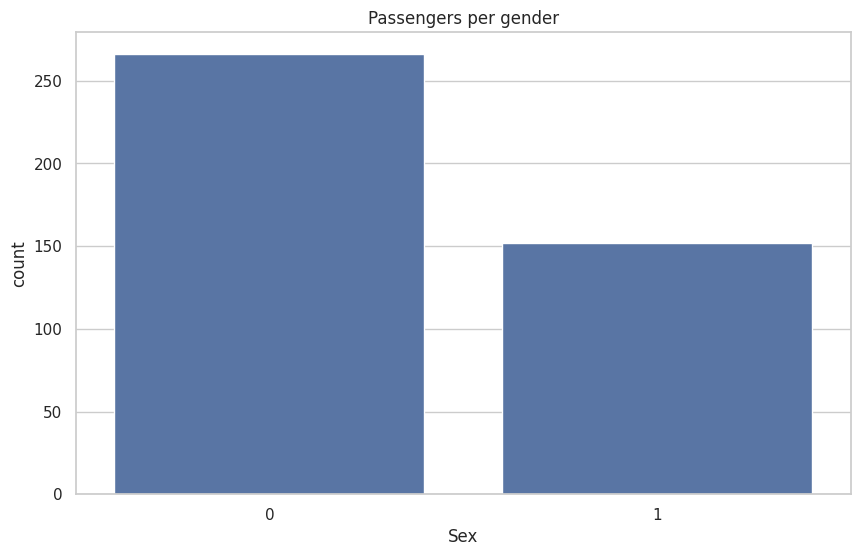

In [29]:
sns.set(style="whitegrid")
palette = sns.color_palette("viridis", as_cmap=True)

# Create the countplot
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex',data=df)
plt.title('Passengers per gender')
plt.show()

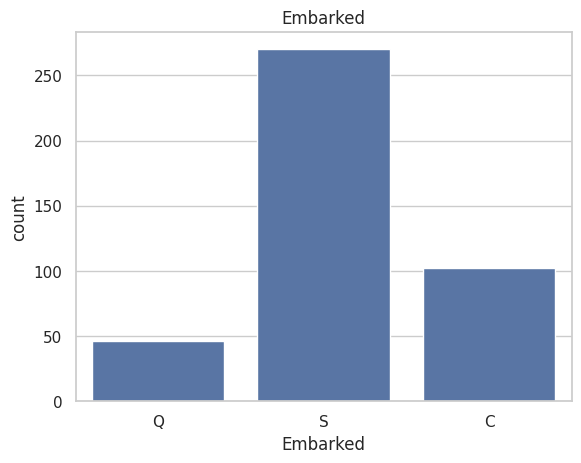

In [30]:
sns.countplot(x='Embarked',data=df)
plt.title('Embarked')
plt.show()

Text(0.5, 1.0, 'Survival by Passenger Class')

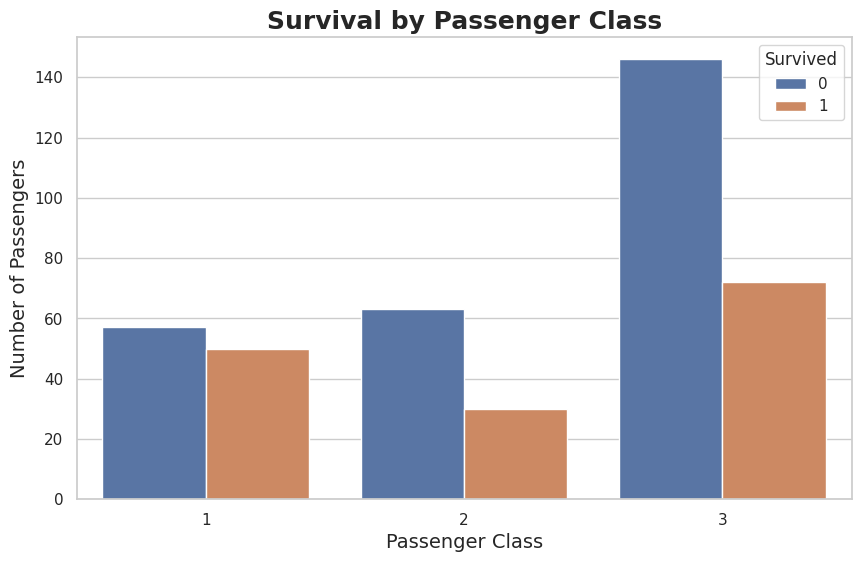

In [32]:
sns.set(style="whitegrid")
palette = sns.color_palette("viridis", as_cmap=True)

# Hue allows to group the data by another categorical variable and use different colors for different groups
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Survived', data=df)

plt.xlabel('Passenger Class', fontsize=14)
plt.ylabel('Number of Passengers', fontsize=14)
plt.title('Survival by Passenger Class', fontsize=18, fontweight='bold')

Text(0.5, 1.0, 'Survival by Passenger Age')

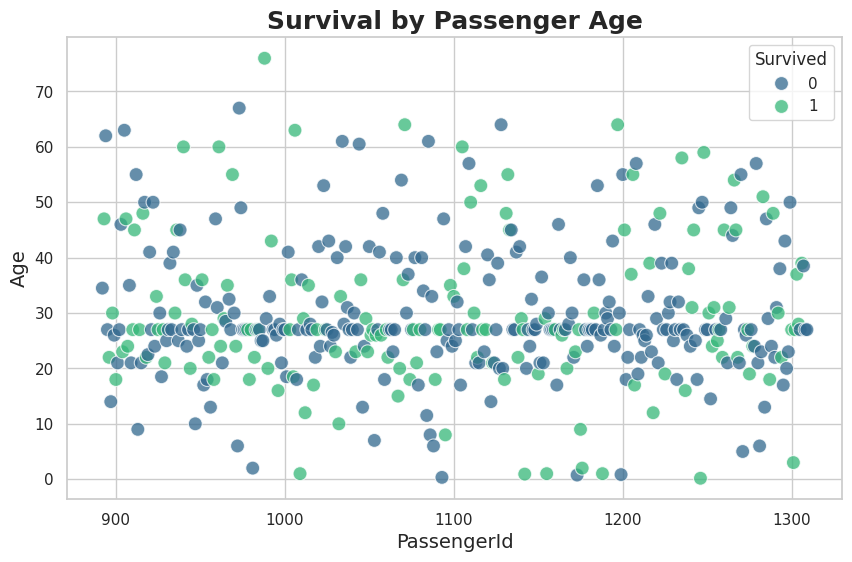

In [36]:
sns.set(style="whitegrid")
palette = sns.color_palette("viridis", as_cmap=True)

# Hue allows to group the data by another categorical variable and use different colors for different groups
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PassengerId', y='Age', data=df, hue='Survived', palette='viridis', s=100, edgecolor='w', alpha=0.75)

plt.xlabel('PassengerId', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.title('Survival by Passenger Age', fontsize=18, fontweight='bold')

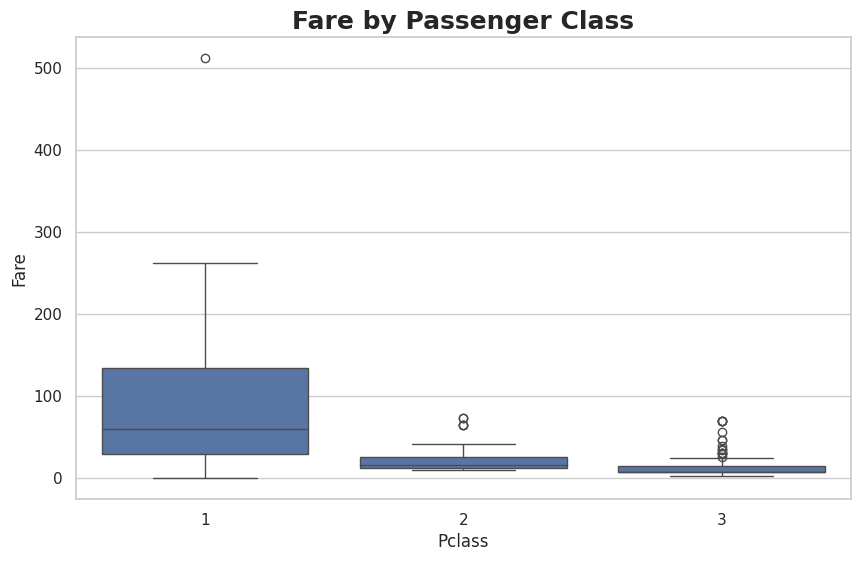

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Fare by Passenger Class', fontsize=18, fontweight='bold')
plt.show()

### Finding the correlation matrix and visualizing it

In [42]:
numeric_cols = ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

corr_matrix = df[numeric_cols].corr()
corr_matrix

PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.023245 -0.026751 -0.031447  0.003818  0.043080   
Survived       -0.023245  1.000000 -0.108615  0.008035  0.099943  0.159120   
Pclass         -0.026751 -0.108615  1.000000 -0.467853  0.001087  0.018721   
Age            -0.031447  0.008035 -0.467853  1.000000 -0.071197 -0.043731   
SibSp           0.003818  0.099943  0.001087 -0.071197  1.000000  0.306895   
Parch           0.043080  0.159120  0.018721 -0.043731  0.306895  1.000000   
Fare            0.008209  0.191382 -0.576619  0.344628  0.171488  0.230001   

                 Fare  
PassengerId  0.008209  
Survived     0.191382  
Pclass      -0.576619  
Age          0.344628  
SibSp        0.171488  
Parch        0.230001  
Fare         1.000000

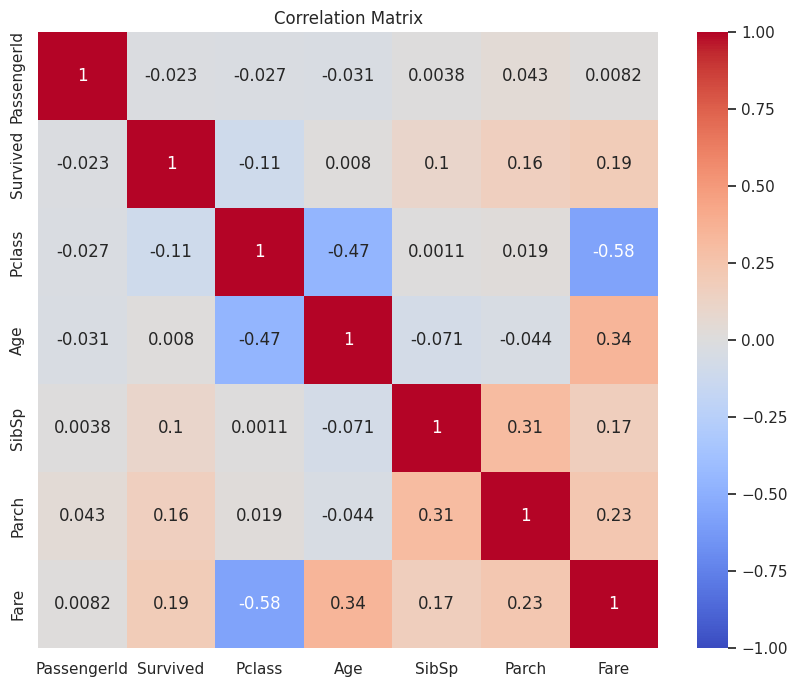

In [43]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

### Creating new features

In [45]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1  # +1 for the passenger themselves

In [47]:
df['FarePerPerson'] = df['Fare'] / (df['FamilySize'])

In [52]:
import numpy as np
bins = [-1, 12, 18, 45, 60, np.inf]
#labels = ['Child', 'Young Adult', 'Adult', 'Middle-Aged', 'Elderly']
labels=[1,2,3,4,5]
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

In [53]:
df

PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name  Sex   Age  SibSp  Parch  \
0                                Kelly, Mr. James    0  34.5      0      0   
1                Wilkes, Mrs. James (Ellen Needs)    1  47.0      1      0   
2                       Myles, Mr. Thomas Francis    0  62.0      0      0   
3                                Wirz, Mr. Albert    0  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)    1  22.0      1      1   
..                                            ...  ...   ...    ...    ...   
413                            Spector, Mr. Woolf    0  27.0      0      0   
414                  Oliva y Ocana, Dona. Fermina    1  39.0      0      0   
415                  Saether, Mr. Simon Sivertsen    0  38.5      0      0   
416                           Ware, Mr. Frederick    0  27.0      0      0   
417                      Peter, Master. Michael J    0  27.0      1      1   

                 Ticket      Fare Embarked  FamilySize  FarePerPerson AgeGroup  
0                330911    7.8292        Q           1       7.829200        3  
1                363272    7.0000        S           2       3.500000        4  
2                240276    9.6875        Q           1       9.687500        5  
3                315154    8.6625        S           1       8.662500        3  
4               3101298   12.2875        S           3       4.095833        3  
..                  ...       ...      ...         ...            ...      ...  
413           A.5. 3236    8.0500        S           1       8.050000        3  
414            PC 17758  108.9000        C           1     108.900000        3  
415  SOTON/O.Q. 3101262    7.2500        S           1       7.250000        3  
416              359309    8.0500        S           1       8.050000        3  
417                2668   22.3583        C           3       7.452767        3  

[418 rows x 14 columns]

In [56]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [57]:
categorical_cols = ['Pclass', 'Sex', 'Embarked']

# Create a column transformer for one-hot encoding
categorical_transformer = OneHotEncoder()

# it allows us to apply different transformations to different columns of the dataset.
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='passthrough'
)

# Fit and transform the data
X = preprocessor.fit_transform(df)

In [59]:
X[0]

array([0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 892, 0, 'Kelly, Mr. James',
       34.5, 0, 0, '330911', 7.8292, 1, 7.8292, 3], dtype=object)

### Standardize numerical features.

In [61]:
from sklearn.preprocessing import StandardScaler


num_features = ['Age', 'Fare']
hellodf=df.copy()

#the StandardScaler transforms the features by subtracting the mean and dividing by the standard deviation of each feature
scaler = StandardScaler()

df[num_features] = scaler.fit_transform(df[num_features])

df

PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name  Sex       Age  SibSp  \
0                                Kelly, Mr. James    0  0.386231      0   
1                Wilkes, Mrs. James (Ellen Needs)    1  1.371370      1   
2                       Myles, Mr. Thomas Francis    0  2.553537      0   
3                                Wirz, Mr. Albert    0 -0.204852      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)    1 -0.598908      1   
..                                            ...  ...       ...    ...   
413                            Spector, Mr. Woolf    0 -0.204852      0   
414                  Oliva y Ocana, Dona. Fermina    1  0.740881      0   
415                  Saether, Mr. Simon Sivertsen    0  0.701476      0   
416                           Ware, Mr. Frederick    0 -0.204852      0   
417                      Peter, Master. Michael J    0 -0.204852      1   

     Parch              Ticket      Fare Embarked  FamilySize  FarePerPerson  \
0        0              330911 -0.498407        Q           1       7.829200   
1        0              363272 -0.513274        S           2       3.500000   
2        0              240276 -0.465089        Q           1       9.687500   
3        0              315154 -0.483466        S           1       8.662500   
4        1             3101298 -0.418472        S           3       4.095833   
..     ...                 ...       ...      ...         ...            ...   
413      0           A.5. 3236 -0.494448        S           1       8.050000   
414      0            PC 17758  1.313753        C           1     108.900000   
415      0  SOTON/O.Q. 3101262 -0.508792        S           1       7.250000   
416      0              359309 -0.494448        S           1       8.050000   
417      1                2668 -0.237906        C           3       7.452767   

    AgeGroup  
0          3  
1          4  
2          5  
3          3  
4          3  
..       ...  
413        3  
414        3  
415        3  
416        3  
417        3  

[418 rows x 14 columns]

# Resampling techniques to address the imbalance.
Oversampling involves increasing the number of minority class samples (less frequent class) to balance the dataset:

In [65]:
len(not_survived)

266

In [66]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

survived = df[df['Survived'] == 1]
not_survived = df[df['Survived'] == 0]

us_unsampled= resample(survived,
                      replace=True,     # Sample with replacement
                      n_samples=len(not_survived),   # Match number of survived samples
                      random_state=42)  # Reproducible results

In [67]:
new_df = pd.concat([not_survived, us_unsampled])
new_df

PassengerId  Survived  Pclass                                 Name  Sex  \
0            892         0       3                     Kelly, Mr. James    0   
2            894         0       2            Myles, Mr. Thomas Francis    0   
3            895         0       3                     Wirz, Mr. Albert    0   
5            897         0       3           Svensson, Mr. Johan Cervin    0   
7            899         0       2         Caldwell, Mr. Albert Francis    0   
..           ...       ...     ...                                  ...  ...   
69           961         1       1  Fortune, Mrs. Mark (Mary McDougald)    1   
52           944         1       2        Hocking, Miss. Ellen Nellie""    1   
74           966         1       1                 Geiger, Miss. Amalie    1   
250         1142         1       2                West, Miss. Barbara J    1   
70           962         1       3            Mulvihill, Miss. Bertha E    1   

          Age  SibSp  Parch      Ticket      Fare Embarked  FamilySize  \
0    0.386231      0      0      330911 -0.498407        Q           1   
2    2.553537      0      0      240276 -0.465089        Q           1   
3   -0.204852      0      0      315154 -0.483466        S           1   
5   -1.229397      0      0        7538 -0.473381        S           1   
7   -0.283663      1      1      248738 -0.118823        S           3   
..        ...    ...    ...         ...       ...      ...         ...   
69   2.395915      1      4       19950  4.076705        S           6   
52  -0.756530      2      1       29105 -0.226401        S           4   
74   0.425637      0      0      113503  3.153331        C           1   
250 -2.260246      1      2  C.A. 34651 -0.141235        S           4   
70  -0.441286      0      0      382653 -0.499827        Q           1   

     FarePerPerson AgeGroup  
0         7.829200        3  
2         9.687500        5  
3         8.662500        3  
5         9.225000        2  
7         9.666667        3  
..             ...      ...  
69       43.833333        4  
52        5.750000        3  
74      211.500000        3  
250       6.937500        1  
70        7.750000        3  

[532 rows x 14 columns]

In [70]:
new_df.to_csv('newtitanicdataset.csv', index=False)